<a href="https://colab.research.google.com/github/SethR404/Kidder/blob/main/LRModels(etc.).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests 
import pandas as pd
import numpy as np
from numpy.ma.core import true_divide
%matplotlib inline
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/SethR404/Kidder/main/anemia_median_income_gdp.csv')
data.rename(columns={'Anemia': 'Anemia Prevelance', 'Medinc': 'DMI', 'GDPPPP': 'GDP(PPP)'}) #DMI = Daily Median Income, GDP PPP per capita (per thousand, international $)


,Unnamed: 0,Location,ParentLocation,Year,Anemia Prevelance,DMI,GDP(PPP)
0,1,Albania,Europe,2019,24.8,7.57,14.34
1,2,Algeria,Africa,2019,33.3,8.01,12.01
2,3,Angola,Africa,2019,44.5,1.84,6.95
3,4,Armenia,Europe,2019,17.3,5.87,14.23
4,5,Australia,Western Pacific,2019,8.5,48.73,52.03
...,...,...,...,...,...,...,...
128,130,Uruguay,Americas,2019,15.0,20.36,24.01
129,131,Uzbekistan,Europe,2019,24.8,3.74,7.66
130,132,Vanuatu,Western Pacific,2019,28.5,3.68,3.27
131,133,Zambia,Africa,2019,31.5,1.51,3.62


In [3]:
data.agg({'Anemia':['mean', 'min', 'max'], 'Medinc':['mean', 'min', 'max'], 'GDPPPP': ['mean', 'min', 'max']})


,Anemia,Medinc,GDPPPP
mean,27.380451,15.314511,19.949098
min,7.400000,1.110000,0.780000
max,59.000000,84.890000,119.420000


In [4]:
data.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Unnamed: 0    38.770076
Year           0.000000
Anemia        12.591745
Medinc        16.949160
GDPPPP        20.932627
dtype: float64

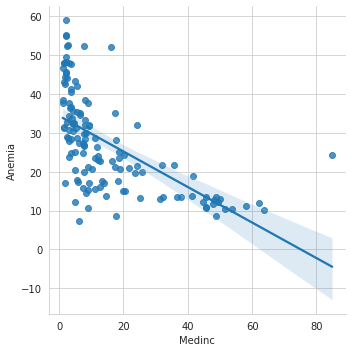

In [5]:
sns.set_style('whitegrid')
sns.lmplot(x ='Medinc', y ='Anemia', data = data)

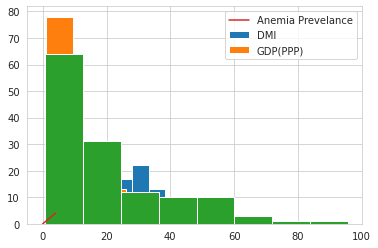

In [6]:

ax = plt.hist(data['Anemia'])
ax = plt.hist(data['Medinc'])
ax = plt.hist(data['GDPPPP'])
plt.plot(range(5))
plt.xlim(-5,100)
plt.legend(['Anemia Prevelance', 'DMI', 'GDP(PPP)'])



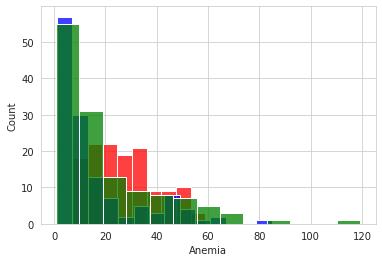

In [7]:
Anem = sns.histplot(data=data["Anemia"] , color="red", label="Anemia Prev.")
Med = sns.histplot(data=data["Medinc"] , color="blue", label="DMI")
GDP = sns.histplot(data=data["GDPPPP"] , color="green", label="GDP(PPP)")

In [8]:
data.dtypes

Unnamed: 0          int64
Location           object
ParentLocation     object
Year                int64
Anemia            float64
Medinc            float64
GDPPPP            float64
dtype: object

In [60]:
X = data[['Anemia']]
Y = data['GDPPPP']
lm = LinearRegression()
lm.fit(X,Y)
Yhat=lm.predict(X)
Yhat[0:5]



array([22.67927419, 13.68607934,  1.8362226 , 30.61444612, 39.92504784])

In [56]:
lm.intercept_

48.918242690709334

In [51]:
lm.coef_

array([-1.05802292])

(0.0, 63.04580966602792)

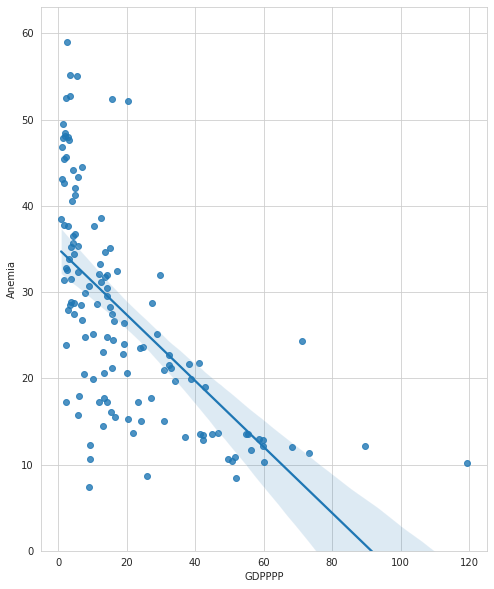

In [52]:
width =8
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="GDPPPP", y="Anemia", data=data)
plt.ylim(0,)

(0.0, 62.58806927003463)

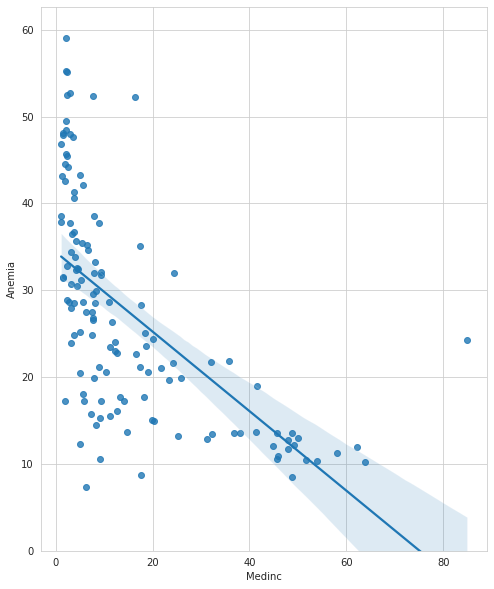

In [15]:
width =8
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="Medinc", y="Anemia", data=data)
plt.ylim(0,)

In [53]:
lm1 = LinearRegression()
vari = data[['Anemia', 'Medinc']]
lm1.fit(vari, data['GDPPPP'])
lm1.intercept_

7.120328907963399

In [45]:
lm1.coef_

array([-0.14629274,  1.09924043])

In [44]:
lm2 = LinearRegression()
lm2.fit(data[['GDPPPP', 'Medinc']],data['Anemia'])
lm2.coef_


array([-0.30310398, -0.10428924])

In [46]:
lm2.intercept_

35.02424078664071

In [54]:
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4050554969706295


In [62]:
print('The R-square is: ', lm1.score(vari, Y))

The R-square is:  0.8964689181780416


In [64]:
print('The R-square is: ', lm2.score(data[['GDPPPP', 'Medinc']], Y))

The R-square is:  -1.0400131855452606
